In [1]:
import enviroment
import pacman
import matplotlib.pyplot as plt

from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [3]:
maze_name = 'Mazes/TinyMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (26, 4)
Goal position: (5, 21)


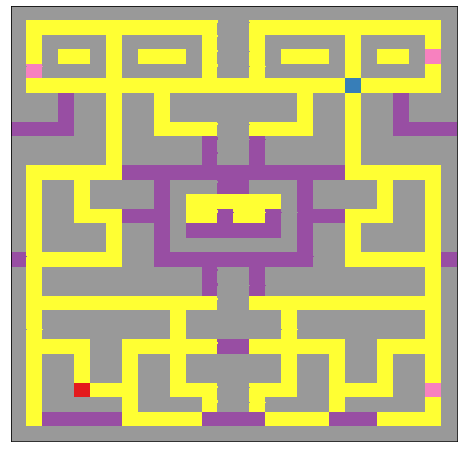

In [4]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_int_grid(initial_position, goal_position), cmap="Set1")
plt.show()

In [5]:
problem = pacman.Problem(maze, initial_position, goal_position, empty_tile_cost=10)

# Breadth First Search - BFS

In [6]:
node, expanded_nodes, food_nodes = pacman.breadth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
288
Number of expanded food nodes:
210
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.

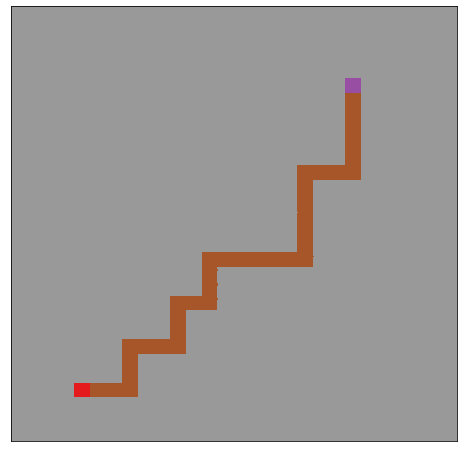

In [7]:
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# Depth First Search - DFS

In [8]:
node, expanded_nodes, food_nodes = pacman.depth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
202
Number of expanded food nodes:
147
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0,

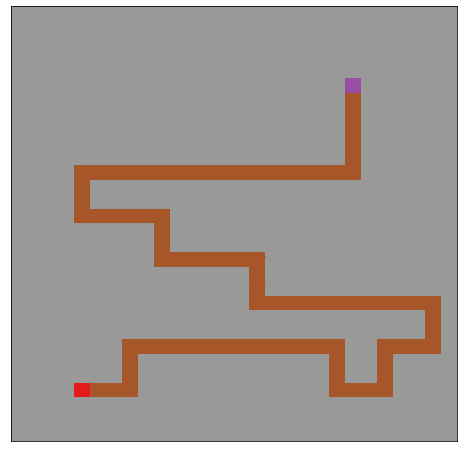

In [9]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# Greedy Search - Manhattan Distance

In [10]:
node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
279
Number of expanded food nodes:
207
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.

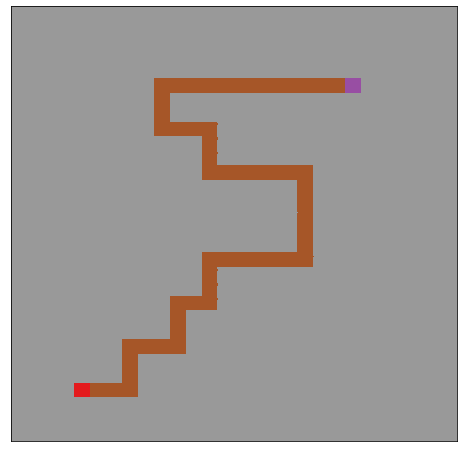

In [11]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# Greedy Search - Euclidean Distance and Ghost Avoidance

In [12]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)
node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem, problem_ghost.h)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
267
Number of expanded food nodes:
196
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.

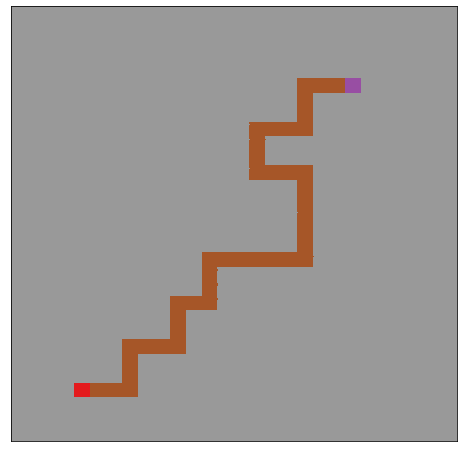

In [13]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# A* - Manhattan Distance

In [14]:
node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
250
Number of expanded food nodes:
211
[<Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.

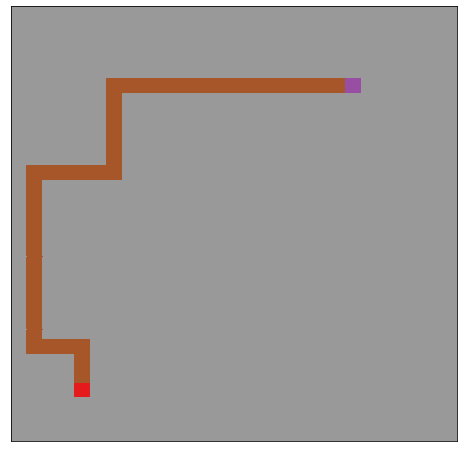

In [15]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# A* - Euclidean Distance and Ghost Avoidance

In [16]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)
node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem, problem_ghost.h)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
243
Number of expanded food nodes:
174
[<Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.

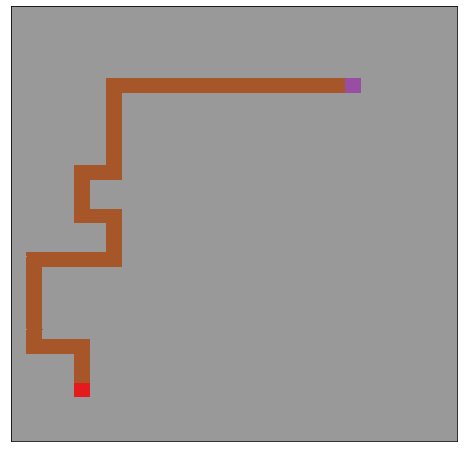

In [17]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()